# **決定木分析（分類木）を流れに沿って行うためのコード**
※注意ロジスティック回帰分析も行えるが、これは目的変数が0/1の場合のみ\
ライブラリのインストール・インポート　⇒　データ読込み　⇒　データ確認　⇒　変数設定　⇒　ロジスティック回帰分析　⇒　決定木分析

# **ライブラリのインストール・インポート**

In [ ]:
pip install japanize-matplotlib

In [2]:
# Import required libraries 
%matplotlib inline 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import japanize_matplotlib 
import seaborn as sns 
sns.set(font="IPAexGothic")  
from scipy.stats import norm

In [3]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
pip install statsmodels

# **データ読込み**

df‗pastは実績データ、df‗futureは予測したいデータを想定。後者はなくても分析を進めることはできる。

※excelファイルの場合は、pd.read_excel('ファイル名')

In [41]:
df_past = pd.read_excel('CS‗category_train.xlsx')
df_future = pd.read_excel('CS‗category_test.xlsx')

※csvファイルの場合は、pd.read_csv('ファイル名')

In [7]:
df_past = pd.read_csv('titanic_train_mod.csv')
df_future = pd.read_csv('titanic_test_mod.csv')

# **データ確認**

In [42]:
#データ確認（先頭5行）
df_past.head()

,Tec.Skill,Complain Act.,Call Act.,Visit number,Advice,return act.,QA,S-CS
0,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
2,1,4,3,1,1,1,1,1
3,4,2,3,1,2,2,2,1
4,3,2,1,2,3,5,5,2


In [43]:
df_past.describe()

,Tec.Skill,Complain Act.,Call Act.,Visit number,Advice,return act.,QA,S-CS
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.00000,169.000000,169.000000
mean,4.946746,4.928994,5.071006,4.597633,4.893491,4.87574,4.911243,2.751479
std,1.030836,0.910089,0.910089,1.059647,0.976153,0.96483,0.885292,0.485272
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,5.000000,5.000000,5.000000,4.000000,5.000000,5.00000,5.000000,3.000000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,3.000000
75%,6.000000,5.000000,6.000000,5.000000,5.000000,5.00000,5.000000,3.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,3.000000


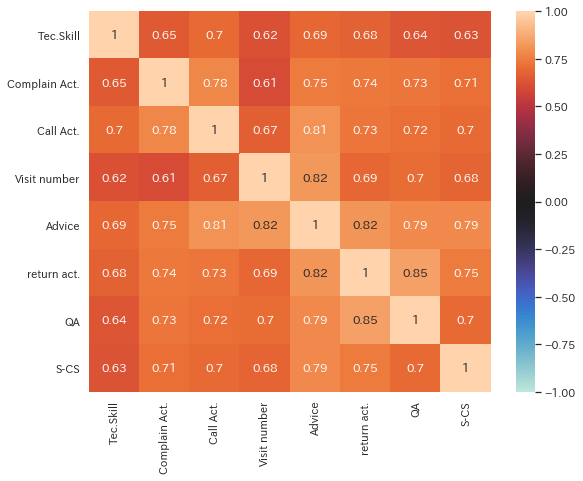

In [44]:
#相関係数行列（ヒートマップ）説明変数間の相関係数が高すぎるものは注意
plt.figure(figsize=(9,7))
sns.heatmap(df_past.corr(), annot=True, vmax=1, vmin=-1, center=0)
plt.show()

In [ ]:
# データの図示
sns.pairplot(data=df_past, kind="reg")
plt.show()

# **変数設定**
説明変数Xと目的変数Yを設定

In [47]:
#カラム＝変数名を確認
df_past.columns

Index(['Tec.Skill', 'Complain Act.', 'Call Act.', 'Visit number', 'Advice',
       'return act.', 'QA', 'S-CS'],
      dtype='object')

In [51]:
#X_nameに説明変数を、y_nameに目的変数を設定
X_name = ['Tec.Skill', 'Complain Act.', 'Call Act.', 'Advice',
       'return act.']
y_name = ['S-CS']
X = df_past[X_name]
y = df_past['S-CS']

# **ロジスティック回帰分析**（0/1データの場合のみ）
モデル指示：線形回帰はsm.OLS()、ロジット回帰はsm.Logit()に\
※有意ではない説明変数は取り除いて、再度ロジット回帰分析を行う

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression  #ロジット回帰の場合、このライブラリが必要

model = sm.Logit(y,sm.add_constant(X))
result = model.fit()
result.summary()

有意ではない説明変数は取り除いて、再度ロジット回帰分析

In [52]:
result.predict(sm.add_constant(df_future[X_name]))

0    0.999923
1    0.999923
2    0.999926
3    0.999135
4    0.999923
5    0.999217
6    0.999923
7    0.004663
8    0.999743
9    0.999923
dtype: float64

結果は、確率として表現される。

# **決定木ライブラリのインストール・インポート**

In [32]:
pip install graphviz

In [33]:
pip install dtreeviz

     |████████████████████████████████| 60 kB 4.2 MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3-py3-none-any.whl size=66637 sha256=cdbfe8df9a928849ebfbf552b40567f81d6730c86f142bc6d75d30ab26987d46
  Stored in directory: /root/.cache/pip/wheels/9f/a6/a1/898c991294471015f13c1e5b456fb8134c1af835db4dd93a7a
Successfully built dtreeviz


In [34]:
from sklearn import tree
from dtreeviz.trees import *
import graphviz

# **決定木の段数設定**
※決定木の段数(max_depth)を任意に指定する

In [53]:
dtree = tree.DecisionTreeClassifier(max_depth=2)
dtree.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

決定木描画（縦向き）\
※class_namesを任意に設定

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


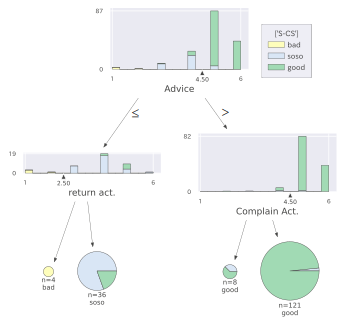

In [54]:
#決定木
viz = dtreeviz(dtree,X,y,
               target_name = y_name,
               feature_names = X_name,
               #orientation='LR',
               class_names = ["bad","soso","good"])


viz

決定木（横向き）\
※class_namesを任意に設定

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


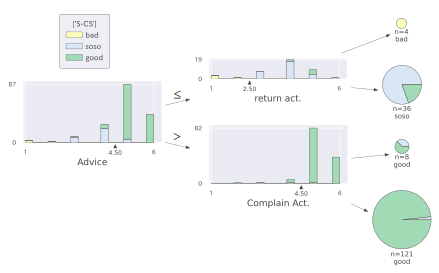

In [55]:
viz = dtreeviz(dtree,X,y,
               target_name = y_name,
               feature_names = X_name,
               orientation='LR',
               class_names = ["bad","soso","good"])


viz

決定木（縦向き）\
※class_namesを任意に設定\
※X=（予測したい説明変数の水準）を任意に設定

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


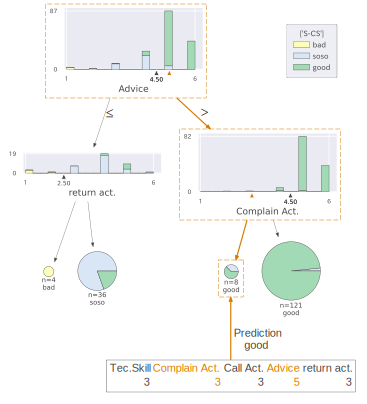

In [57]:
viz = dtreeviz(dtree,X,y,
               target_name = y_name,
               feature_names = X_name,
               class_names = ["bad","soso","good"],
               X = [3,3,3,5,3])

viz

決定木（横向き）\
※class_namesを任意に設定\
※X=（予測したい説明変数の水準）を任意に設定

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


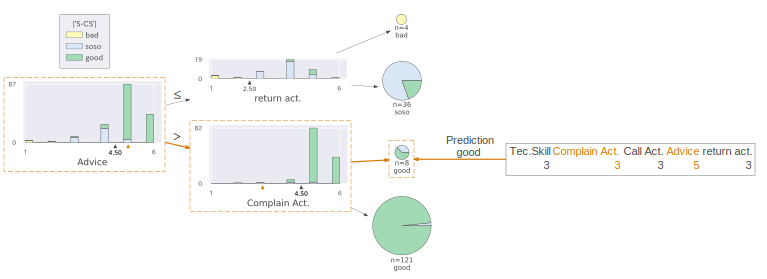

In [58]:
viz = dtreeviz(dtree,X,y,
               target_name = y_name,
               feature_names = X_name,
               orientation='LR',
               class_names = ["bad","soso","good"],
               X = [3,3,3,5,3],
               )

viz

予測したい対象（df_future）が複数ある場合は以下を実行。

In [ ]:
dtree.predict(df_future)

# **正解率シミュレート**
※max_depthを増やすと精度は上がる方向にあるが、過学習も進むと思う。精度よりもまず解釈ならば、解釈しやすいdepthを素直に設定べきと思う。

学習データとテストデータの設定\
test_sizeで比率設定（0.2ならば、80%学習,20%テスト）

In [59]:
# データセットを学習データとテストデータに分割（random_stateは0）
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=0)
# 分割の確認
print('分割の確認：',X_train.shape, X_test.shape, y_train.shape, y_test.shape)

分割の確認： (135, 5) (34, 5) (135,) (34,)


決定木の段数指定(max_depth)⇒学習⇒正解率計算

In [60]:
# 学習実行
# インスタンスの作成
model = DecisionTreeClassifier(max_depth=2)
# モデルの作成
model.fit(X_train, y_train)

# 学習データからの予測値
pred_train = model.predict(X_train)
# テストデータからの予測値
pred_test = model.predict(X_test)

# 学習データを用いた分類モデルの評価
print('正解率(学習データ) = ', metrics.accuracy_score(y_train, pred_train))

# テストデータを用いた分類モデルの評価
print('正解率(テストデータ) = ', metrics.accuracy_score(y_test, pred_test))

正解率(学習データ) =  0.9407407407407408
正解率(テストデータ) =  0.8823529411764706
